# Exploratory Data Analysis (EDA) Vs Confirmatory Data Analysis (CDA):
- In this project, we are going to learn about two important data analysis methods **EDA** (Exploratory Data Analysis) and **CDA** (Confirmatory Data Analysis).

## Task 1: What Is Exploratory Data Analysis (EDA)?
***Definition:*** EDA or Exploratory Data Analysis is one of the data analysis methods where we use different statistical summaries and graphical representations to perform initial investigations on the data to discover interesting patterns, spot anomalies and overall for a better understanding of our data.  

In [1]:
# Importing libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing plotly modules for visualization

# import plotly.express as px
# import plotly.graph_objects as go
# import plotly.offline as pyo

In [2]:
# Importing the dataset

df = pd.read_excel(r"C:\Users\cw\Documents\Test data 4.xlsx", sheet_name=9)
df

,Date,Transaction,Beverage Item,Region,Sales Person,Crates Sold,Sales Price (Per Crate),Sales Amount,Discount %,Discount Amount,Net Sales Amount,Cost of Goods Sold,Profit
0,2020-12-31,1757,Pepsi,Gari Shahu,Imtiaz,460,240,110400,0.22,24288.00,86112.00,51667.200,34444.800
1,2020-12-31,1758,Fanta,Model Town,Umair,875,168,147000,0.28,41160.00,105840.00,63504.000,42336.000
2,2020-12-31,1759,Fanta,Defence,Hamid,749,168,125832,0.24,30199.68,95632.32,57379.392,38252.928
3,2020-12-30,1756,Pepsi,Samnabad,Imtiaz,102,240,24480,0.04,979.20,23500.80,14100.480,9400.320
4,2020-12-28,1755,Fanta,Samnabad,Imtiaz,518,168,87024,0.16,13923.84,73100.16,43860.096,29240.064
...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,2019-01-05,1205,Pepsi,Defence,Arshad,528,240,126720,0.24,30412.80,96307.20,57784.320,38522.880
555,2019-01-05,1206,Pepsi,Bahria Town,Salman,646,240,155040,0.30,46512.00,108528.00,65116.800,43411.200
556,2019-01-04,1203,Dew,Bahria Town,Hamid,605,300,181500,0.36,65340.00,116160.00,69696.000,46464.000
557,2019-01-03,1202,Fanta,Samnabad,Umair,105,168,17640,0.02,352.80,17287.20,10372.320,6914.880


In [5]:
# Shape of the dataset

print("Number of instances:", df.shape[0])
print("Number of variables:", df.shape[1])

Number of instances: 559
Number of variables: 13


In [6]:
# Information regarding the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     559 non-null    datetime64[ns]
 1   Transaction              559 non-null    int64         
 2   Beverage Item            559 non-null    object        
 3   Region                   559 non-null    object        
 4   Sales Person             559 non-null    object        
 5   Crates Sold              559 non-null    int64         
 6   Sales Price (Per Crate)  559 non-null    int64         
 7   Sales Amount             559 non-null    int64         
 8   Discount %               559 non-null    float64       
 9   Discount Amount          559 non-null    float64       
 10  Net Sales Amount         559 non-null    float64       
 11  Cost of Goods Sold       559 non-null    float64       
 12  Profit                   559 non-nul

##  Task 2: EDA - Where To Start ?
In this task, we are going to talk about how to start our exploration:
- Different column data types
- How are the columns related
- What are the different information in our data
- Make a list of the information and start from the first.

In [7]:
# Data types of the columns

df.dtypes

Date                       datetime64[ns]
Transaction                         int64
Beverage Item                      object
Region                             object
Sales Person                       object
Crates Sold                         int64
Sales Price (Per Crate)             int64
Sales Amount                        int64
Discount %                        float64
Discount Amount                   float64
Net Sales Amount                  float64
Cost of Goods Sold                float64
Profit                            float64
dtype: object

## Dataset Contains Following Information:
- Transaction information (order data)
- Date Information (Date of Sales/Transactions)
- Region information (Place)
- Information about products (Beverage Items)
- Sales Information (Sales, Profit, Quantity, Cost and Discounts)

## Task 3: Data Exploration: Date Information

In [8]:
df.head()

,Date,Transaction,Beverage Item,Region,Sales Person,Crates Sold,Sales Price (Per Crate),Sales Amount,Discount %,Discount Amount,Net Sales Amount,Cost of Goods Sold,Profit
0,2020-12-31,1757,Pepsi,Gari Shahu,Imtiaz,460,240,110400,0.22,24288.00,86112.00,51667.200,34444.800
1,2020-12-31,1758,Fanta,Model Town,Umair,875,168,147000,0.28,41160.00,105840.00,63504.000,42336.000
2,2020-12-31,1759,Fanta,Defence,Hamid,749,168,125832,0.24,30199.68,95632.32,57379.392,38252.928
3,2020-12-30,1756,Pepsi,Samnabad,Imtiaz,102,240,24480,0.04,979.20,23500.80,14100.480,9400.320
4,2020-12-28,1755,Fanta,Samnabad,Imtiaz,518,168,87024,0.16,13923.84,73100.16,43860.096,29240.064


In [10]:
# Time span of our data

df["Date"] = pd.to_datetime(df["Date"])
from_ = df["Date"].min()
to_ = df["Date"].max()
print("We have the sales information from", from_, "to", to_)

We have the sales information from 2019-01-01 00:00:00 to 2020-12-31 00:00:00


In [3]:
# Sorting the data by date

df1 = df.sort_values(by="Date")
df1

,Date,Transaction,Beverage Item,Region,Sales Person,Crates Sold,Sales Price (Per Crate),Sales Amount,Discount %,Discount Amount,Net Sales Amount,Cost of Goods Sold,Profit
558,2019-01-01,1201,Fanta,Gulberg,Ali,223,168,37464,0.06,2247.84,35216.16,21129.696,14086.464
557,2019-01-03,1202,Fanta,Samnabad,Umair,105,168,17640,0.02,352.80,17287.20,10372.320,6914.880
556,2019-01-04,1203,Dew,Bahria Town,Hamid,605,300,181500,0.36,65340.00,116160.00,69696.000,46464.000
553,2019-01-05,1204,7 Up,Samnabad,Hamid,226,324,73224,0.14,10251.36,62972.64,37783.584,25189.056
555,2019-01-05,1206,Pepsi,Bahria Town,Salman,646,240,155040,0.30,46512.00,108528.00,65116.800,43411.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2020-12-28,1755,Fanta,Samnabad,Imtiaz,518,168,87024,0.16,13923.84,73100.16,43860.096,29240.064
3,2020-12-30,1756,Pepsi,Samnabad,Imtiaz,102,240,24480,0.04,979.20,23500.80,14100.480,9400.320
2,2020-12-31,1759,Fanta,Defence,Hamid,749,168,125832,0.24,30199.68,95632.32,57379.392,38252.928
1,2020-12-31,1758,Fanta,Model Town,Umair,875,168,147000,0.28,41160.00,105840.00,63504.000,42336.000


In [4]:
# Some data preparation: let's extract year, month and day from the order date column

df1["Year"] = pd.DatetimeIndex(df1["Date"]).year
df1["Month"] = pd.DatetimeIndex(df1["Date"]).month
df1["Day"] = pd.DatetimeIndex(df1["Date"]).day
df1.head()

,Date,Transaction,Beverage Item,Region,Sales Person,Crates Sold,Sales Price (Per Crate),Sales Amount,Discount %,Discount Amount,Net Sales Amount,Cost of Goods Sold,Profit,Year,Month,Day
558,2019-01-01,1201,Fanta,Gulberg,Ali,223,168,37464,0.06,2247.84,35216.16,21129.696,14086.464,2019,1,1
557,2019-01-03,1202,Fanta,Samnabad,Umair,105,168,17640,0.02,352.80,17287.20,10372.320,6914.880,2019,1,3
556,2019-01-04,1203,Dew,Bahria Town,Hamid,605,300,181500,0.36,65340.00,116160.00,69696.000,46464.000,2019,1,4
553,2019-01-05,1204,7 Up,Samnabad,Hamid,226,324,73224,0.14,10251.36,62972.64,37783.584,25189.056,2019,1,5
555,2019-01-05,1206,Pepsi,Bahria Town,Salman,646,240,155040,0.30,46512.00,108528.00,65116.800,43411.200,2019,1,5


In [5]:
# Profit gained overtime by different products

df_yearly_profit = df1.groupby(["Year", "Beverage Item"]).agg({"Profit":"sum"}).reset_index()
df_yearly_profit

,Year,Beverage Item,Profit
0,2019,7 Up,1445522.112
1,2019,Coca-Cola,2160654.336
2,2019,Dew,1632064.800
3,2019,Fanta,1396571.904
4,2019,Pepsi,2277356.160
5,2019,Sprite,2368133.376
6,2020,7 Up,1328330.016
7,2020,Coca-Cola,1785323.520
8,2020,Dew,1518067.200
9,2020,Fanta,1356508.608


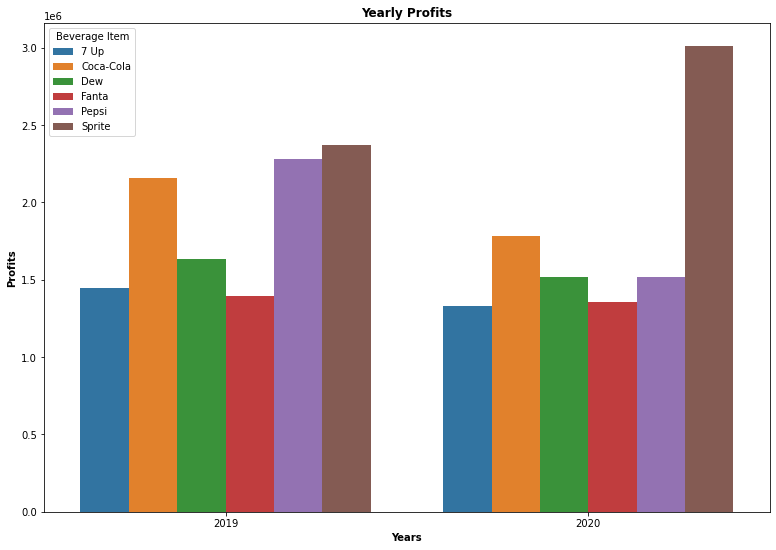

In [31]:
# Linechart for the yearly profits

plt.figure(figsize=(13, 9))
sns.barplot(x="Year", y="Profit", hue="Beverage Item", data=df_yearly_profit)
plt.title("Yearly Profits", weight="bold")
plt.xlabel("Years", weight="bold")
plt.ylabel("Profits", weight="bold")
plt.show()

In [6]:
# Profits gained over months by different products

df_monthly_profits = df1.groupby(["Month", "Beverage Item"]).agg({"Profit":"sum"}).reset_index()
df_monthly_profits

,Month,Beverage Item,Profit
0,1,7 Up,336042.432
1,1,Coca-Cola,391656.960
2,1,Dew,148982.400
3,1,Fanta,356454.336
4,1,Pepsi,511960.320
...,...,...,...
67,12,Coca-Cola,293633.280
68,12,Dew,167661.600
69,12,Fanta,268364.544
70,12,Pepsi,158186.880


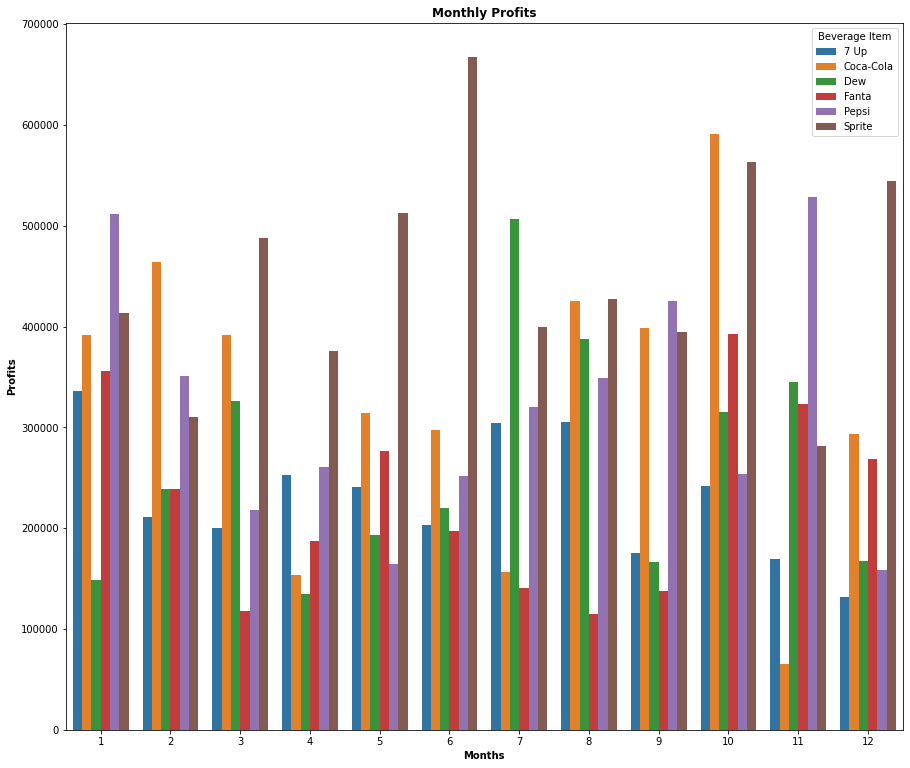

In [39]:
# Monthly profits from the sale of products

plt.figure(figsize=(15, 13))
sns.barplot(x="Month", y="Profit", hue="Beverage Item", data=df_monthly_profits)
plt.title("Monthly Profits", weight="bold")
plt.xlabel("Months", weight="bold")
plt.ylabel("Profits", weight="bold")
plt.show()

In [40]:
# Unique Sales Personnel

df["Sales Person"].unique()

array(['Imtiaz', 'Umair', 'Hamid', 'Naveed', 'Saad', 'Salman', 'Arshad',
       'Ali'], dtype=object)

In [46]:
# Number of unique Sales Personnel

print("There are",df["Sales Person"].nunique(),"unique Sales Personnels.")

There are 8 unique Sales Personnels.


In [7]:
# Top 5 sales personnel who generated highest profit

top_5 = df.groupby(["Sales Person"]).agg({"Profit" : "sum"}).reset_index().sort_values(by="Profit",ascending=False).head(5)
top_5

,Sales Person,Profit
3,Imtiaz,3121125.120
5,Saad,3030579.744
7,Umair,2761133.376
1,Arshad,2742223.776
4,Naveed,2649733.728


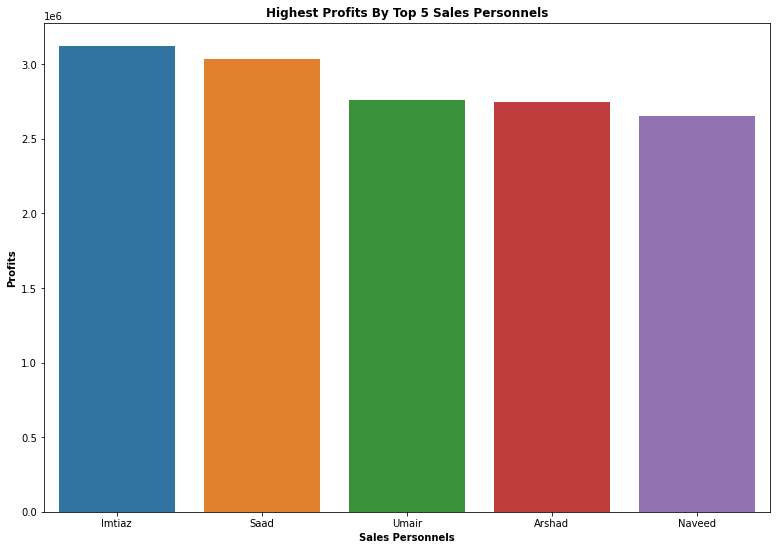

In [50]:
# Bar chart for the above data 

plt.figure(figsize=(13, 9))
sns.barplot(x="Sales Person", y="Profit", data=top_5)
plt.title("Highest Profits By Top 5 Sales Personnels", weight="bold")
plt.xlabel("Sales Personnels", weight="bold")
plt.ylabel("Profits", weight="bold")
plt.show()

## Task 4: Data Exploration: Place (Location) Aspect
Let's analyze the profits gained in different regions

In [8]:
# Region wise profits

regions = df.groupby(["Region"]).agg({"Profit" : "sum"}).reset_index()
regions

,Region,Profit
0,Bahria Town,3103350.912
1,Defence,4158560.928
2,Gari Shahu,2767598.688
3,Gulberg,2821868.736
4,Gulshan-E-Ravi,3543844.992
5,Model Town,2662432.416
6,Samnabad,2739497.952


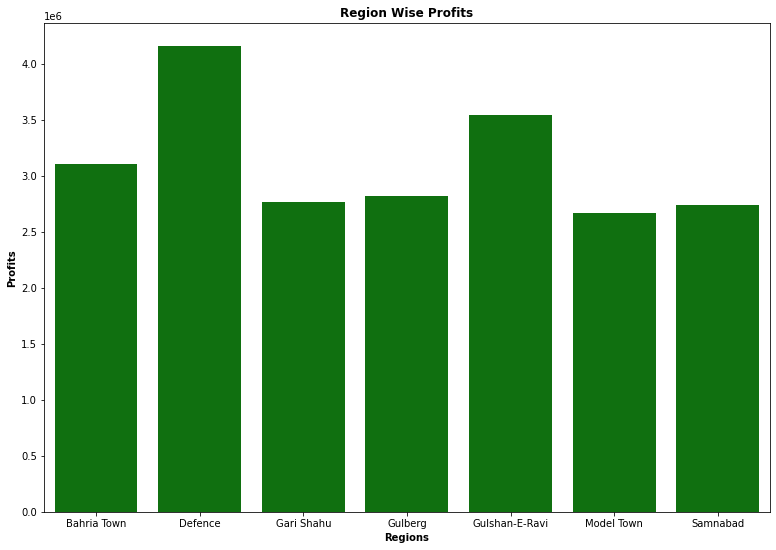

In [12]:
# Bar chart for region wise sales

plt.figure(figsize=(13, 9))
sns.barplot(x="Region", y="Profit", data=regions, color="green")
plt.title("Region Wise Profits", weight="bold")
plt.xlabel("Regions", weight="bold")
plt.ylabel("Profits", weight="bold")
plt.show()

## Task 5: Data Exploration - Information About Products:

In [9]:
# Product wise profit

product = df1.groupby("Beverage Item").agg({"Profit" : "sum"}).reset_index()
product

,Beverage Item,Profit
0,7 Up,2773852.128
1,Coca-Cola,3945977.856
2,Dew,3150132.000
3,Fanta,2753080.512
4,Pepsi,3794171.520
5,Sprite,5379940.608


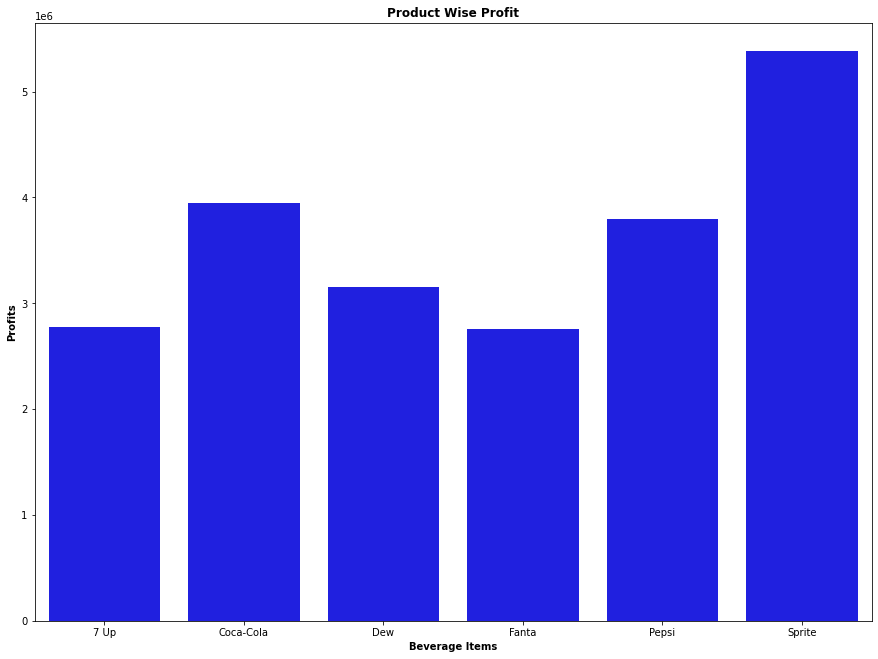

In [11]:
# Bar Chart for product wise profit

plt.figure(figsize=(15, 11))
sns.barplot(x="Beverage Item", y="Profit", data=product, color="blue")
plt.title("Product Wise Profit", weight="bold")
plt.xlabel("Beverage Items", weight="bold")
plt.ylabel("Profits", weight="bold")
plt.show()

## Task 6: Data Exploration: Product Sales Information (Sales, Quantity, Profit): 

In [16]:
# Statistical Summary of quantity column (used for checking whether there is any outliers in the columns)

df1["Crates Sold"].describe()

count    559.000000
mean     521.348837
std      289.237983
min       11.000000
25%      263.000000
50%      521.000000
75%      774.000000
max      999.000000
Name: Crates Sold, dtype: float64

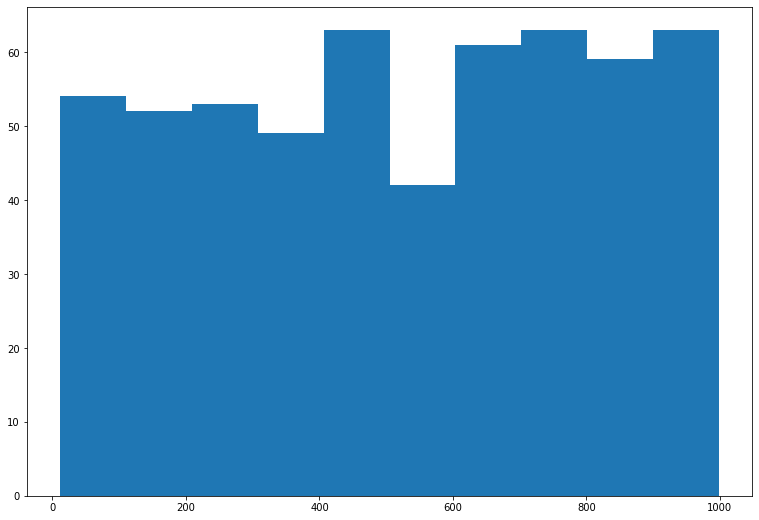

In [18]:
# Histogram

plt.figure(figsize=(13, 9))
plt.hist(x="Crates Sold", data=df1)
plt.show()

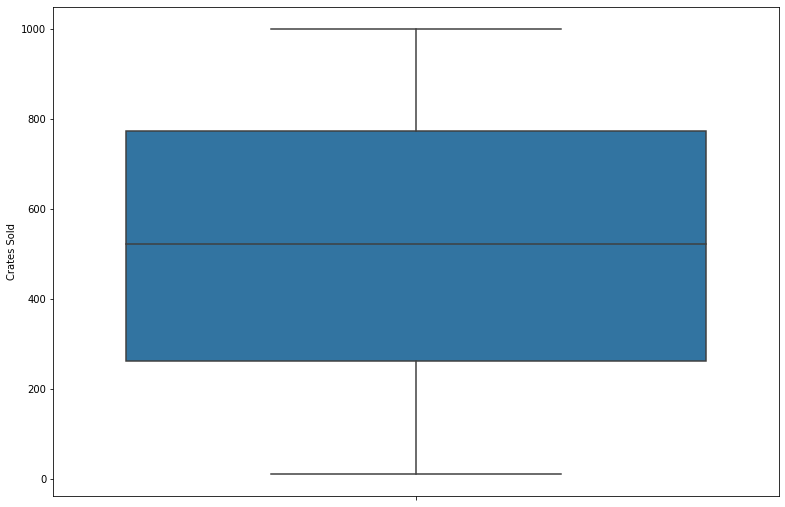

In [20]:
# Box Plot

plt.figure(figsize=(13, 9))
sns.boxplot(y="Crates Sold", data=df1)
plt.show()

In [21]:
# Distribution analysis

df1["Profit"].describe()

count      559.000000
mean     38993.120973
std      19542.573236
min       1293.600000
25%      24397.824000
50%      40048.800000
75%      51059.232000
max      83244.672000
Name: Profit, dtype: float64

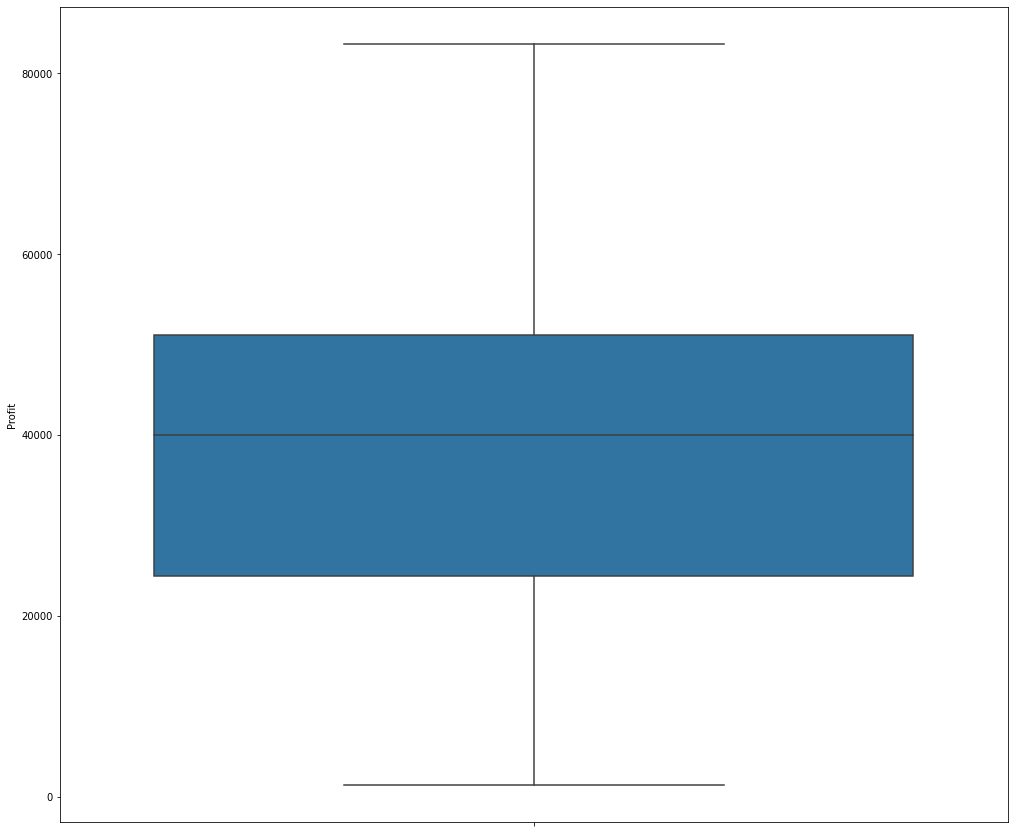

In [24]:
# Box Plot

plt.figure(figsize=(17, 15))
sns.boxplot(y="Profit", data=df1)
plt.show()

## Task 7: What Is Confirmatory Data Analysis (CDA)?

***Definition:*** Confirmatory Data Analysis is the process of using the statistical summary and graphical representations to evaluate the validity of an assumption about the data at hand.

We have the following assumption about our data and we are going to use different exploration techniques we learned in the previous tasks to validate them.

*Assumption 1:* - Sprite is the highest sold beverage item as compared to other products.

*Assumption 2* - In Defence, the sales for the beverage item is high due to the purchasing power of the customers as they have higher consumer price index. 